# Kostal Plenticor Plus 4.2 - Data setup for PVLIB

To use the Plenticore Kostal 4.2 inverter in PVLIB calculations, the data needs to be collected manually since the standard SAM library for cec converters maintained by Sandia Labs does not include this item yet. 

[Here is the link to pvlib documentation.](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.pvsystem.retrieve_sam.html)

The following sources have been used:

- DB Plenticore Technical Specification (DB_PLENTICORE-plus_en.pdf)
- Performance Model for Grid-Connected Photovoltaic Inverters (Perf_Model_inverters.pdf)
- SAM Photovoltaic Model Technical Reference Update (SAM_PV_Model.pdf)



In [26]:
my_data = {}

# Nominal voltage --> taken from grid connection [V]
my_data["Vac"] = 400.0

# Maximum AC Power [W]
my_data["Paco"] = 4200.0

# Maximum DC Power [W]
max_efficiency = 0.971
my_data["Pdco"] = my_data["Paco"] / max_efficiency

# Nomial DC Voltage [V]
my_data["Vdco"] = 570.0

# Power consumption during operation [W]
# = DC Power required to start the conversion process --> from own experience
my_data["Pso"] = 20.0

# Power consumption at night [W] (including 24 h comumption measurements)
my_data["Pnt"] = 7.9

# Maximum DC Voltage [V]
my_data["Vdcmax"] = 900.0

# Maximum DC Current [A]
my_data["Idcmax"] = 13.0

# Minimum MPPT DC Voltage [V]
my_data["Mppt_low"] = 120.0

# Maximum MPPT DC Voltage [V]
my_data["Mppt_high"] = 720.0

# Nomial AC Voltage [V]
my_data["Vaco"] = 460.0

## Converter efficiency for different voltage levels

As shown in the Plenticore specification, the efficiency for different voltage levels looks like this:

![](pictures/Efficiency_Data.png?raw=true)

Data for reference voltage (570V), low voltage (180V) and high voltage (720V) is added manually to following lists of tuples, extracted from aboves graphic.

In [27]:
# Offset used at DC Power Output = 0W for low volatage curve (guess, is not in spec):
offset_pso_low = 20.0  # W
offset_pso_high = 50.0 # W


# Definition of the Tuple: (Power DC, Power AC = Power DC * Efficiency(Pac/Pac,r))

# Ref. Voltage: 570 V
rated_power_ref = [(my_data["Pso"], 0.0),
               (0.05 * my_data["Pdco"], 0.05 * 0.879 * my_data["Pdco"]), # 10%
               (0.10 * my_data["Pdco"], 0.10 * 0.908 * my_data["Pdco"]), # 10%
               (0.15 * my_data["Pdco"], 0.15 * 0.930 * my_data["Pdco"]), # 15%
               (0.20 * my_data["Pdco"], 0.20 * 0.942 * my_data["Pdco"]), # 20%
               (0.25 * my_data["Pdco"], 0.25 * 0.949 * my_data["Pdco"]), # 25%
               (0.30 * my_data["Pdco"], 0.30 * 0.953 * my_data["Pdco"]), # 30%
               (0.35 * my_data["Pdco"], 0.35 * 0.956 * my_data["Pdco"]), # 35%
               (0.40 * my_data["Pdco"], 0.40 * 0.96 * my_data["Pdco"]),  # 40%
               (0.5  * my_data["Pdco"], 0.5 * 0.965 * my_data["Pdco"]),  # 50%
               (0.6  * my_data["Pdco"], 0.6 * 0.967 * my_data["Pdco"]),  # 60%
               (0.75 * my_data["Pdco"], 0.75 * 0.969 * my_data["Pdco"]), # 75%
               (0.82 * my_data["Pdco"], 0.82 * 0.970 * my_data["Pdco"]), # 82%
               (1.00 * my_data["Pdco"], 1.0 * 0.971 * my_data["Pdco"]),  # 100%
               ]

# Low Voltage: 180 V
rated_power_low = [(my_data["Pso"] + offset_pso_low, 0.0),
               (0.05 * my_data["Pdco"], 0.05 * 0.87 * my_data["Pdco"]), # 10%
               (0.10 * my_data["Pdco"], 0.10 * 0.903 * my_data["Pdco"]), # 10%
               (0.15 * my_data["Pdco"], 0.15 * 0.925 * my_data["Pdco"]), # 15%
               (0.20 * my_data["Pdco"], 0.20 * 0.938 * my_data["Pdco"]), # 20%
               (0.25 * my_data["Pdco"], 0.25 * 0.944 * my_data["Pdco"]), # 25%
               (0.30 * my_data["Pdco"], 0.30 * 0.948 * my_data["Pdco"]), # 30%
               (0.35 * my_data["Pdco"], 0.35 * 0.952 * my_data["Pdco"]), # 35%
               (0.40 * my_data["Pdco"], 0.40 * 0.954 * my_data["Pdco"]), # 40%
               (0.5  * my_data["Pdco"], 0.5 * 0.958 * my_data["Pdco"]),  # 50%
               (0.6  * my_data["Pdco"], 0.6 * 0.960 * my_data["Pdco"]),  # 60%
               (0.75 * my_data["Pdco"], 0.75 * 0.962 * my_data["Pdco"]), # 75%
               (0.82 * my_data["Pdco"], 0.82 * 0.962 * my_data["Pdco"]), # 82%
               (1.00 * my_data["Pdco"], 1.0 * 0.963 * my_data["Pdco"]),  # 100%
]

# high Voltage: 720 V
rated_power_high = [(my_data["Pso"] + offset_pso_high , 0.0),
               (0.10 * my_data["Pdco"], 0.10 * 0.870 * my_data["Pdco"]), # 10%
               (0.15 * my_data["Pdco"], 0.15 * 0.904 * my_data["Pdco"]), # 15%
               (0.20 * my_data["Pdco"], 0.20 * 0.925 * my_data["Pdco"]), # 20%
               (0.25 * my_data["Pdco"], 0.25 * 0.935 * my_data["Pdco"]), # 25%
               (0.30 * my_data["Pdco"], 0.30 * 0.941 * my_data["Pdco"]), # 30%
               (0.35 * my_data["Pdco"], 0.35 * 0.945 * my_data["Pdco"]), # 35%
               (0.40 * my_data["Pdco"], 0.40 * 0.950 * my_data["Pdco"]), # 40%
               (0.5  * my_data["Pdco"], 0.5 * 0.958 * my_data["Pdco"]),  # 50%
               (0.6  * my_data["Pdco"], 0.6 * 0.960 * my_data["Pdco"]),  # 60%
               (0.75 * my_data["Pdco"], 0.75 * 0.963 * my_data["Pdco"]), # 75%
               (0.82 * my_data["Pdco"], 0.82 * 0.964 * my_data["Pdco"]), # 82%
               (1.00 * my_data["Pdco"], 1.0 * 0.965 * my_data["Pdco"]),  # 100%
               ]


In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
# Polynomial regression of data for reference voltage:
Coeff = np.polyfit(*zip(*rated_power_ref),2)
Polynom_ref    = np.poly1d(np.polyfit(*zip(*rated_power_ref), 2))
my_data["C0"] = Coeff[0]

c0_ref = Coeff[0]

# Polynomial regression of data for low voltage:
Coeff = np.polyfit(*zip(*rated_power_low),2)
Polynom_low    = np.poly1d(np.polyfit(*zip(*rated_power_low), 2))
c0_low = Coeff[1]

# Polynomial regression of data for high voltage:
Coeff = np.polyfit(*zip(*rated_power_high),2)
Polynom_high    = np.poly1d(np.polyfit(*zip(*rated_power_high), 2))
c0_high = Coeff[1]


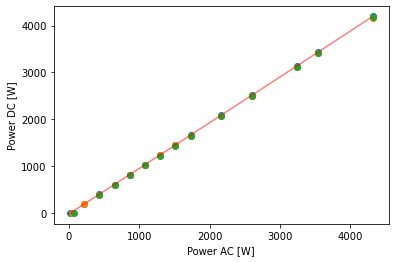

In [30]:
plt.scatter(*zip(*rated_power_ref))
plt.scatter(*zip(*rated_power_low))
plt.scatter(*zip(*rated_power_high))

x=list()
y=list()
for i in range(4300):
    xval = float(i)
    yval = Polynom_ref(xval)
    x.append(xval)
    y.append(yval)

plt.plot(x,y,c="red",alpha=0.5 )
plt.xlabel("Power AC [W]")
plt.ylabel("Power DC [W]")
plt.show()

In [31]:
my_data

{'Vac': 400.0,
 'Paco': 4200.0,
 'Pdco': 4325.437693099897,
 'Vdco': 570.0,
 'Pso': 20.0,
 'Pnt': 7.9,
 'Vdcmax': 900.0,
 'Idcmax': 13.0,
 'Mppt_low': 120.0,
 'Mppt_high': 720.0,
 'Vaco': 460.0,
 'C0': 1.3350132212515217e-06}

## Variation of DC input voltage @ Max. DC Power (Coefficient C1)

In [32]:
from scipy.stats import linregress

c1_calibration_data = [(0, Polynom_ref(my_data["Pdco"])),
                       (180.0 - 570.0, Polynom_low(my_data["Pdco"])),
                       (720.0 - 570.0, Polynom_high(my_data["Pdco"]))]
b, a, r, p, std  = linregress(*zip(*c1_calibration_data))

my_data["C1"] = b

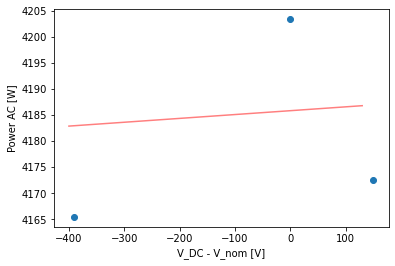

In [33]:
plt.scatter(*zip(*c1_calibration_data))
plt.plot([-400,130],[a,a+130*b],c="red",alpha=0.5)
plt.ylabel("Power AC [W]")
plt.xlabel("V_DC - V_nom [V]")
plt.show()

The Sandia-Approach is not best suiting for the Plenticore, since the linear regression model used for Parameter C1 does not fit to the characteristics of the Plenticore converter (the efficiency is max at the nominal voltage (570 V)). Therefore, C1 does not really repesent the characteristics of the converter.

## Variation of DC input voltage @ 0 DC Power (Coefficient C2)

In [34]:
c2_calibration_data = [(0, my_data["Pso"]),
                       (180.0 - 570.0,my_data["Pso"] + offset_pso_low),
                       (720.0 - 570.0,my_data["Pso"] + offset_pso_high)]
b, a, r, p, std  = linregress(*zip(*c2_calibration_data))

my_data["C2"] = b

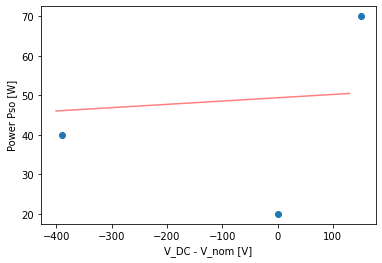

In [35]:
plt.scatter(*zip(*c2_calibration_data))
plt.plot([-400,130],[a,a+130*b],c="red",alpha=0.5)
plt.ylabel("Power Pso [W]")
plt.xlabel("V_DC - V_nom [V]")
plt.show()

## Variation of C0 Coefficients for ref, low and high voltage (Coefficient C3)

In [36]:
c3_calibration_data = [(0, c0_ref),
                       (180.0 - 570.0, c0_low),
                       (720.0 - 570.0, c0_high)]
b, a, r, p, std  = linregress(*zip(*c3_calibration_data))

my_data["C3"] = b

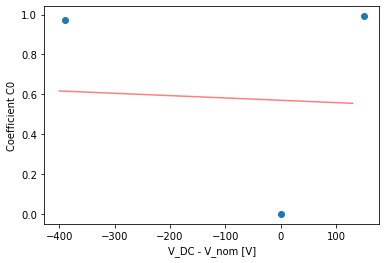

In [37]:
plt.scatter(*zip(*c3_calibration_data))
plt.plot([-400,130],[a,a+130*b],c="red",alpha=0.5)
plt.ylabel("Coefficient C0")
plt.xlabel("V_DC - V_nom [V]")
plt.show()

# Summary - Converter Data

In [38]:
my_data

{'Vac': 400.0,
 'Paco': 4200.0,
 'Pdco': 4325.437693099897,
 'Vdco': 570.0,
 'Pso': 20.0,
 'Pnt': 7.9,
 'Vdcmax': 900.0,
 'Idcmax': 13.0,
 'Mppt_low': 120.0,
 'Mppt_high': 720.0,
 'Vaco': 460.0,
 'C0': 1.3350132212515217e-06,
 'C1': 0.03014763459019129,
 'C2': 0.0341055341055341,
 'C3': -0.00047685384843106505}

In [39]:
import pandas as pd

In [40]:
my_df = pd.Series(my_data)

In [41]:
my_df

Vac           400.000000
Paco         4200.000000
Pdco         4325.437693
Vdco          570.000000
Pso            20.000000
Pnt             7.900000
Vdcmax        900.000000
Idcmax         13.000000
Mppt_low      120.000000
Mppt_high     720.000000
Vaco          460.000000
C0              0.000001
C1              0.030148
C2              0.034106
C3             -0.000477
dtype: float64